In [1]:
import numpy as np
import matplotlib.pyplot  as  plt
from matplotlib.ticker import MaxNLocator
from scipy.special import binom

In [2]:
fparams =  {'xtick.labelsize': 20,
            'ytick.labelsize': 20,
            'axes.labelsize': 20,
            'axes.titlesize': 20,
            'font.size': 20,
            'legend.fontsize': 18,
            'text.usetex': True,
            'legend.frameon' : False,
            'svg.fonttype': 'path'}
plt.rcParams.update(fparams)

$p_k(\tau) = \sum\limits_{i=1}^{\frac{n!}{k!(n-k)!}} |\langle k i | \psi(\tau) \rangle|^2 = \sum\limits_{i=1}^{\frac{n!}{k!(n-k)!}} |\langle k i | e^{- i H \tau} | gs \rangle|^2$

$p_k^{\beta} = \sum\limits_{i=1}^{\frac{n!}{k!(n-k)!}} \langle k i | \dfrac{1}{Z} e^{-\beta H_0}  | k i \rangle $

In [42]:
# finite temperature
def pb(k, b, n):
    f = np.exp(-b * k) / (1. + np.exp(-b)) ** n * binom(n, k)
    return f

# infinite temperature
def pbinf(k, n):
    f = 1. / 2. ** n * binom(n, k)
    return f

In [86]:
num = [4,5,6,7]
nr = 100 # -- number of realizations
omega = 0.4 # -- chemical potential in the fermion model
time = np.load('data/SYK2/time.npy', allow_pickle = True)

p = {}
pav = {}
S = {}
SS2 = {}
Sav = {}
S2av = {}
VarS = {}

for n in range(len(num)):
    p[n] = np.load('data/SYK2/p_N={}_nr={}_omega={}.npy'.format(num[n], nr, omega), allow_pickle = True)
    pav[n] = np.load('data/SYK2/pav_N={}_nr={}_omega={}.npy'.format(num[n], nr, omega), allow_pickle = True)
    S[n] = np.load('data/SYK2/S_N={}_nr={}_omega={}.npy'.format(num[n], nr, omega), allow_pickle = True)
    SS2[n] = np.load('data/SYK2/SS2_N={}_nr={}_omega={}.npy'.format(num[n], nr, omega), allow_pickle = True)
    Sav[n] = np.load('data/SYK2/Sav_N={}_nr={}_omega={}.npy'.format(num[n], nr, omega), allow_pickle = True)
    S2av[n] = np.load('data/SYK2/S2av_N={}_nr={}_omega={}.npy'.format(num[n], nr, omega), allow_pickle = True)
    VarS[n] = np.load('data/SYK2/VarS_N={}_nr={}_omega={}.npy'.format(num[n], nr, omega), allow_pickle = True)

In [87]:
dt_ind = 50
ones_arr = np.array([1 for i in range(len(time))])
print(time[dt_ind])
#print(1 / omega)

S_erg = {}
VarS_erg = {}
beta = {}

for n in range(len(num)):
    S_eq = Sav[n][dt_ind:]
    S_erg_v = np.sum(S_eq) / len(S_eq)
    S_erg[n] = S_erg_v * ones_arr
    VarS_erg_v = np.sum(S2av[n][dt_ind:]) / len(S_eq) - (S_erg_v + num[n] / 2) **2
    VarS_erg[n] = VarS_erg_v * ones_arr
    beta[n] = np.arcsinh( - S_erg_v / VarS_erg_v)
    print(beta[n])

2.5
0.46361210823223314
0.40804499892992663
0.34885133745000263
0.3248094171188722


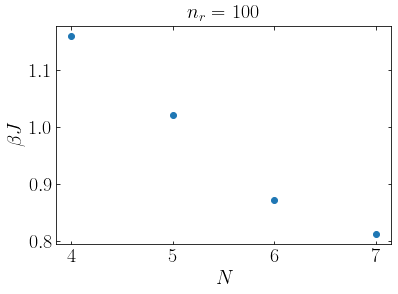

In [88]:
fig, ax = plt.subplots()
ax.set_xlabel(r'$N$')
ax.set_ylabel(r'$\beta J$')
ax.set_title(r'$n_r = $'+' ${}$'.format(nr))
for n in range(len(num)):
    ax.plot(num[n], beta[n] / omega,  'o', color = 'tab:blue')
ax.tick_params(which='major', direction="in", top = "True", right = "True"); 
ax.tick_params(which='minor', direction="in")
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
#plt.savefig('figs/T_nr={}_omega={}.svg'.format(nr, omega))

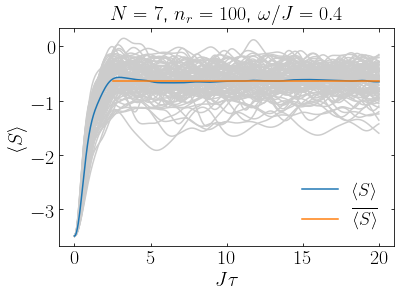

In [91]:
num_ind = 3
fig, ax = plt.subplots()
ax.set_xlabel(r'$J \tau$')
ax.set_ylabel(r'$\langle S \rangle$')
ax.set_title(r'$N = $'+' ${}$, '.format(num[num_ind])+r'$n_r = $'+' ${}$, '.format(nr)+r'$\omega/J = $'+' ${}$'.format(omega))
for j in range(nr):
    ax.plot(time, np.transpose(S[num_ind])[j], color='0.8')
ax.plot(time, Sav[num_ind],  '-', label = r'$\langle S \rangle$')
ax.plot(time[dt_ind:], S_erg[num_ind][dt_ind:],  '-', label = r'$\overline{\langle S \rangle}$')
ax.legend()
ax.tick_params(which='major', direction="in", top = "True", right = "True"); 
ax.tick_params(which='minor', direction="in")
#plt.savefig('figs/S_N={}_nr={}_omega={}.svg'.format(num[num_ind], nr, omega))

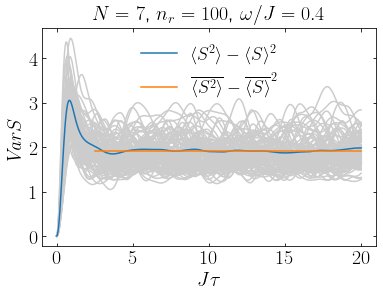

In [92]:
num_ind = 3
fig, ax = plt.subplots()
ax.set_xlabel(r'$J \tau$')
ax.set_ylabel(r'${\it Var}  S$')
ax.set_title(r'$N = $'+' ${}$, '.format(num[num_ind])+r'$n_r = $'+' ${}$, '.format(nr)+r'$\omega/J = $'+' ${}$'.format(omega))
for j in range(nr):
    ax.plot(time, np.transpose(SS2[num_ind])[j], color='0.8')
ax.plot(time, VarS[num_ind],  '-', label = r'$\langle S^2 \rangle - \langle S \rangle^2$')
ax.plot(time[dt_ind:], VarS_erg[num_ind][dt_ind:],  '-', label = r'$\overline{\langle S^2 \rangle} - \overline{\langle S \rangle}^2$')
ax.legend()
ax.tick_params(which='major', direction="in", top = "True", right = "True"); 
ax.tick_params(which='minor', direction="in")
#plt.savefig('figs/VarS_N={}_nr={}_omega={}.svg'.format(num[num_ind], nr, omega))

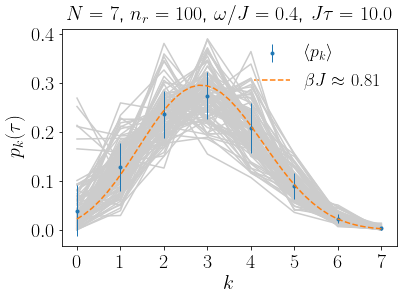

In [94]:
num_ind = 3
t_ind = 200
keys = np.linspace(0, num[num_ind], num[num_ind]+1)
fig, ax = plt.subplots()
ax.set_xlabel(r'$k$')
ax.set_ylabel(r'$p_k(\tau)$')
ax.set_title(r'$N = $'+' ${}$, '.format(num[num_ind])+r'$n_r = $'+' ${}$, '.format(nr)+r'$\omega/J = $'+' ${}$, '.format(omega)+r'$J \tau = $'+' ${}$'.format(time[t_ind]))
for j in range(nr):
    ax.plot(keys, p[num_ind][t_ind][j], color='0.8', zorder = j)    
ax.errorbar(keys, pav[num_ind][t_ind], yerr = np.std(p[num_ind][t_ind], 0), color = 'tab:blue', barsabove = True, fmt = '.', zorder = nr, elinewidth=1, label = r'$\langle p_k \rangle$') 
qs = np.linspace(0, num[num_ind], 41)
ax.plot(qs, pb(qs, beta[num_ind], num[num_ind]),  '--', color = 'tab:orange', zorder = nr + 1, label = r'$\beta J  \approx $'+' ${}$'.format(round(beta[num_ind] / omega, 2)))
#ax.plot(keys, pb(keys, beta[num_ind], num[num_ind]),  '--', color = 'tab:orange', zorder = nr + 1, label = r'$\beta J  \approx $'+' ${}$'.format(round(beta[num_ind] / omega, 2)))
ax.tick_params(which='minor', direction="in")
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
handles, labels = plt.gca().get_legend_handles_labels()
handles.reverse()
labels.reverse()
ax.legend([handles[i] for i in range(2)], [labels[i] for i in range(2)])
#plt.savefig('figs/pk_N={}_nr={}_omega={}_tau={}.svg'.format(num[num_ind], nr, omega, time[t_ind]))